# Regressão logística

In [33]:
import pandas as pd

In [34]:
# Carregando o dataset
water = pd.read_csv('https://raw.githubusercontent.com/pinheiro-lucas/water-potability/main/data/water_potability.csv', sep=',')

In [35]:
# Exibe informações sobre o dataset
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [36]:
# Exibe as primeiras linhas do dataset
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [37]:
# Exibe informações estatísticas sobre o dataset
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [38]:
# Faz a contagem de elementos nulos por coluna
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [39]:
# Preenche os valores nulos com a média da coluna
water.fillna(water.mean(), inplace=True)

In [40]:
# Conta a quantidade de valores com cada tipo de potabilidade
water.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [41]:
# Para evitar um viés no treinamento, é necessário balancear o dataset

# from sklearn.utils import resample

# potable_water_balanced = resample(
#   water[water['Potability']==1],
#   replace = True,
#   n_samples = 1998
# )

# from sklearn.utils import shuffle

# water = pd.concat([water[water['Potability']==0], potable_water_balanced])
# water = shuffle(water)

In [42]:
# Demonstra que agora o dataset está balanceado
water.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [43]:
# Descreve quais colunas tem um maior impacto na potabilidade da água
water.corr()["Potability"].sort_values()

Organic_carbon    -0.030001
Sulfate           -0.020619
Hardness          -0.013837
Conductivity      -0.008128
ph                -0.003287
Turbidity          0.001581
Trihalomethanes    0.006960
Chloramines        0.023779
Solids             0.033743
Potability         1.000000
Name: Potability, dtype: float64

In [44]:
# Separa o dataset em dados de treino e teste
from sklearn.model_selection import train_test_split

y = water["Potability"]
x = water.drop(columns=["Potability"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [45]:
# Treina o modelo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)



# Padronizando as variáveis independentes (é uma boa prática para regressão logística)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model.fit(X_train_scaled, y_train)

# Tenta prever a potabilidade da água
y_pred = model.predict(X_test)

# Avalia a acurácia do modelo
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.6286876907426246


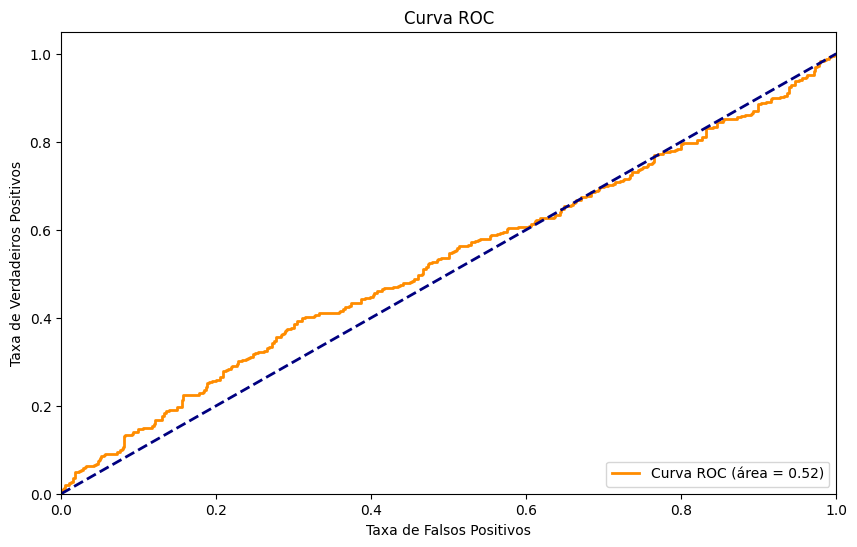

In [50]:
#Grafico da curva ROC

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Métricas de Avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Curva ROC e AUC
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

conf_matrix, accuracy, precision, recall, f1, roc_auc

# Plotando a Curva ROC
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()